In [2]:
import numpy as np
import matplotlib.pyplot as plt
from allensdk.core.cell_types_cache import CellTypesCache

import os


In [3]:
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# this saves the NWB file to 'cell_types/specimen_464212183/ephys.nwb'
cell_specimen_id = 464212183
data_set = ctc.get_ephys_data(cell_specimen_id)

/home/samuel/anaconda3/envs/py374/lib/python3.7/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/home/samuel/anaconda3/envs/py374/lib/python3.7/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/home/samuel/anaconda3/envs/py374/lib/python3.7/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/home/samuel/anaconda3/envs/py374/lib/python3.7/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/home/samuel/anaconda3/envs/py374/lib/python3.7/site-packages/allensdk/core/nwb_data

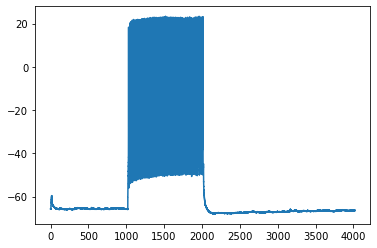

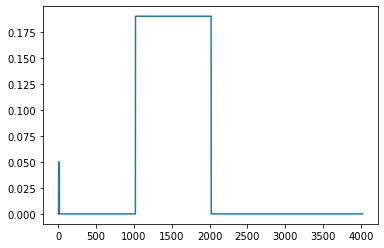

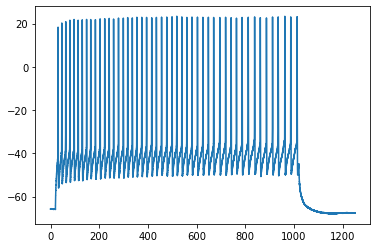

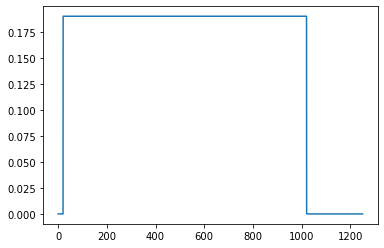

In [4]:
sweep_number = 34
sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
i *= 1e9 # to nA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
dt = 1.0/sampling_rate # sec
dt *= 1000 # to msec

t = np.arange(0, len(v)) * dt

plt.figure()
plt.plot(t, v)

plt.figure()
plt.plot(t, i)

start_time = 1000
end_time = start_time + 1250


start_idx = int(start_time/dt)
end_idx = int(end_time/dt)

v_part = v[start_idx:end_idx]
i_part = i[start_idx:end_idx]
t_part = t = np.arange(0, len(v_part)) * dt

plt.figure()
plt.plot(t_part, v_part)

plt.figure()
plt.plot(t_part, i_part)


In [8]:
dt

0.005

In [5]:
np.savetxt('data/t_Lueckmann17.csv', t_part, delimiter=",")
np.savetxt('data/i_Lueckmann17.csv', i_part, delimiter=",")
np.savetxt('data/v_Lueckmann17.csv', v_part, delimiter=",")

In [1]:
dt

NameError: name 'dt' is not defined